<a href="https://colab.research.google.com/github/KrushnaTaur/ML-Practice/blob/main/02_Data_Preprocessing/05_Outlier_Detection_and_Treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = {
    'Name': ['Amit', 'Riya', 'Karan', 'Neha', 'Vikas', 'Sonal', 'Deepak', 'Pooja', 'Tina', 'Raj'],
    'Income': [25000, 27000, 26000, 25500, 30000, 28000, 100000, 31000, 27500, 90000]  # outliers: 100000, 90000
}

df = pd.DataFrame(data)
df

,Name,Income
0,Amit,25000
1,Riya,27000
2,Karan,26000
3,Neha,25500
4,Vikas,30000
5,Sonal,28000
6,Deepak,100000
7,Pooja,31000
8,Tina,27500
9,Raj,90000


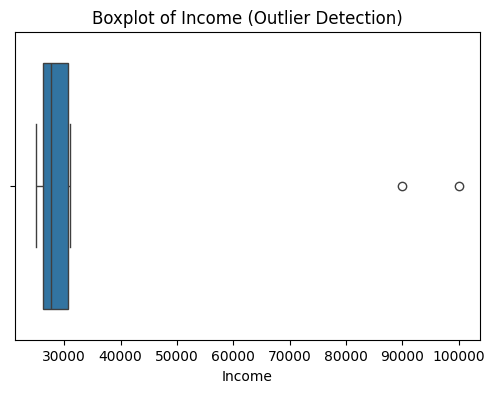

In [3]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Income'])
plt.title("Boxplot of Income (Outlier Detection)")
plt.show()

extreme points (outliers) on the right side.

In [4]:
# Detect Outliers Using IQR (Interquartile Range)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

outliers = df[(df['Income'] < lower_limit) | (df['Income'] > upper_limit)]
print("\nDetected Outliers:\n", outliers)

Q1: 26250.0
Q3: 30750.0
IQR: 4500.0
Lower Limit: 19500.0
Upper Limit: 37500.0

Detected Outliers:
      Name  Income
6  Deepak  100000
9     Raj   90000


In [5]:
# Detect Outliers Using Z-score
from scipy import stats

z_scores = np.abs(stats.zscore(df['Income']))
threshold = 3  # Common threshold

outliers_z = df[z_scores > threshold]
print("Outliers using Z-score method:\n", outliers_z)

Outliers using Z-score method:
 Empty DataFrame
Columns: [Name, Income]
Index: []


Treat Outliers

In [6]:
#  Remove Outliers
df_no_outliers = df[(df['Income'] >= lower_limit) & (df['Income'] <= upper_limit)]
df_no_outliers

,Name,Income
0,Amit,25000
1,Riya,27000
2,Karan,26000
3,Neha,25500
4,Vikas,30000
5,Sonal,28000
7,Pooja,31000
8,Tina,27500


In [8]:
# Cap (Winsorize) Outliers
df_capped = df.copy()
df_capped['Income'] = np.where(df_capped['Income'] > upper_limit, upper_limit,
                               np.where(df_capped['Income'] < lower_limit, lower_limit, df_capped['Income']))
df_capped


,Name,Income
0,Amit,25000.0
1,Riya,27000.0
2,Karan,26000.0
3,Neha,25500.0
4,Vikas,30000.0
5,Sonal,28000.0
6,Deepak,37500.0
7,Pooja,31000.0
8,Tina,27500.0
9,Raj,37500.0


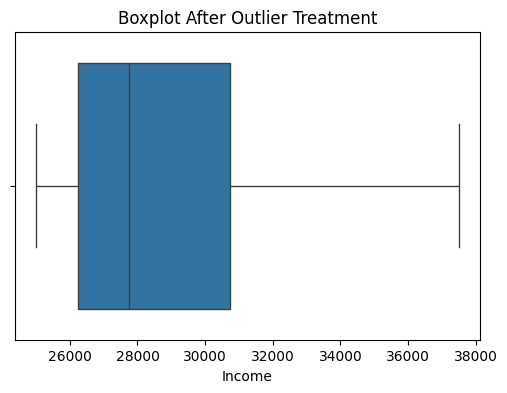

In [9]:
# Visualize After Treatment
plt.figure(figsize=(6,4))
sns.boxplot(x=df_capped['Income'])
plt.title("Boxplot After Outlier Treatment")
plt.show()

Mini Task

Find and treat outliers in “Income” column of a dataset.

In [10]:
# Mini Task
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data = {
    'Name': ['Amit', 'Riya', 'Karan', 'Neha', 'Vikas', 'Sonal', 'Deepak', 'Pooja', 'Tina', 'Raj'],
    'Income': [25000, 27000, 26000, 25500, 30000, 28000, 100000, 31000, 27500, 90000]
}
df = pd.DataFrame(data)

In [12]:
df

,Name,Income
0,Amit,25000
1,Riya,27000
2,Karan,26000
3,Neha,25500
4,Vikas,30000
5,Sonal,28000
6,Deepak,100000
7,Pooja,31000
8,Tina,27500
9,Raj,90000


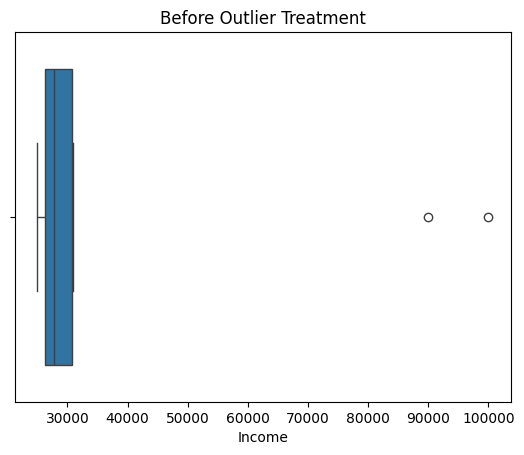

In [13]:
# Step 1: Visualize
sns.boxplot(x=df['Income'])
plt.title("Before Outlier Treatment")
plt.show()

In [14]:
# Step 2: Detect using IQR
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [15]:
# Step 3: Cap Outliers
df['Income'] = np.where(df['Income'] > upper_limit, upper_limit,
                        np.where(df['Income'] < lower_limit, lower_limit, df['Income']))


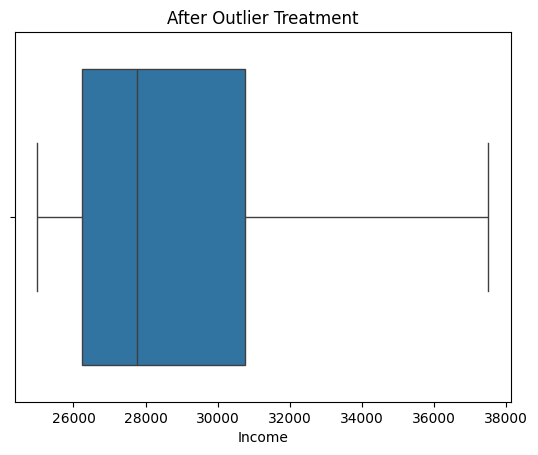

In [16]:

# Step 4: Visualize After Treatment
sns.boxplot(x=df['Income'])
plt.title("After Outlier Treatment")
plt.show()
